In [30]:
from keras.models import Sequential,Input
from keras.layers import Dense
from keras.layers import LSTM
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from keras.models import load_model

In [31]:
import matplotlib.pyplot as plt

## Time Series Visualization

In [32]:
data = pd.read_csv("data/data/train_data_final_50k.csv", header = None)

In [33]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,613,614,615,616,617,618,619,620,621,622
0,528,158,112,23,0.150380,0.146330,0.142520,0.153820,0.148660,0.138230,...,0.149050,0.148270,0.140620,0.133380,0.134310,0.138130,0.139070,0.134450,0.124640,1
1,367,89,173,20,0.212500,0.197260,0.194210,0.215200,0.204170,0.202180,...,0.123590,0.120340,0.116290,0.114440,0.111110,0.110490,0.108930,0.106310,0.104780,1
2,283,190,55,17,0.027484,0.036190,0.046603,0.019973,0.032946,0.047286,...,0.114170,0.111660,0.111410,0.111810,0.110960,0.109900,0.109130,0.108310,0.106670,0
3,424,166,90,29,0.174210,0.170880,0.174460,0.190960,0.182380,0.176380,...,0.109080,0.103190,0.096503,0.091461,0.088297,0.085691,0.084188,0.082517,0.081374,1
4,18,221,249,25,0.055317,0.058417,0.059609,0.042918,0.049833,0.056509,...,0.020098,0.020716,0.021334,0.021952,0.022570,0.023188,0.023806,0.024424,0.025042,1


In [34]:
data_for_vis1 = data.iloc[0]
data_for_vis2 = data.iloc[2]

In [35]:
time_series_feats1 = data_for_vis1[22:622]
time_series_feats2 = data_for_vis2[22:622]
#print(len(time_series_feats1))

In [36]:
time_series_feats1_reshaped = time_series_feats1.reshape(60,10)
time_series_feats2_reshaped = time_series_feats2.reshape(60,10)

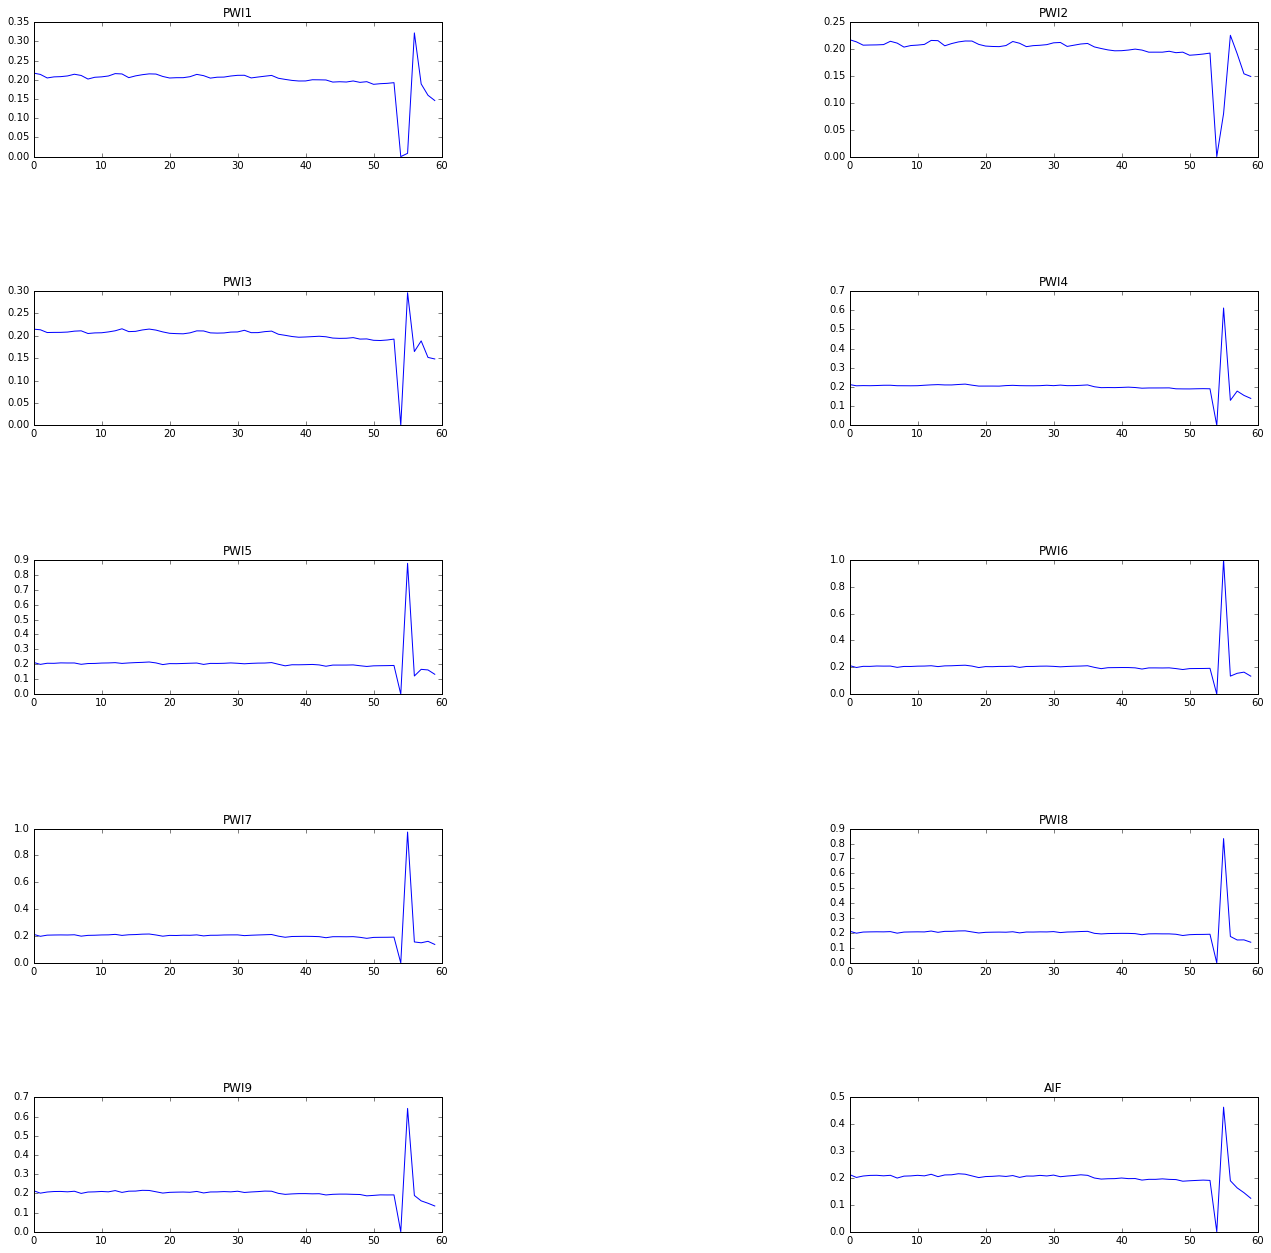

In [37]:
plt.figure(figsize = (20,20))

plt.subplot(521)    
plt.plot(time_series_feats1_reshaped[:,0])
plt.title('PWI1')
   
plt.subplot(522)
plt.plot(time_series_feats1_reshaped[:,1])
plt.title('PWI2')
    
plt.subplot(523)
plt.plot(time_series_feats1_reshaped[:,2])
plt.title('PWI3')
    
plt.subplot(524)
plt.plot(time_series_feats1_reshaped[:,3])
plt.title('PWI4')

plt.subplot(525)
plt.plot(time_series_feats1_reshaped[:,4])
plt.title('PWI5')

plt.subplot(526)
plt.plot(time_series_feats1_reshaped[:,5])
plt.title('PWI6')

plt.subplot(527)
plt.plot(time_series_feats1_reshaped[:,6])
plt.title('PWI7')

plt.subplot(528)
plt.plot(time_series_feats1_reshaped[:,7])
plt.title('PWI8')

plt.subplot(529)
plt.plot(time_series_feats1_reshaped[:,8])
plt.title('PWI9')

plt.subplot(5,2,10)
plt.plot(time_series_feats1_reshaped[:,9])
plt.title('AIF')
  
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=1,
                    wspace=1)

    
plt.show()

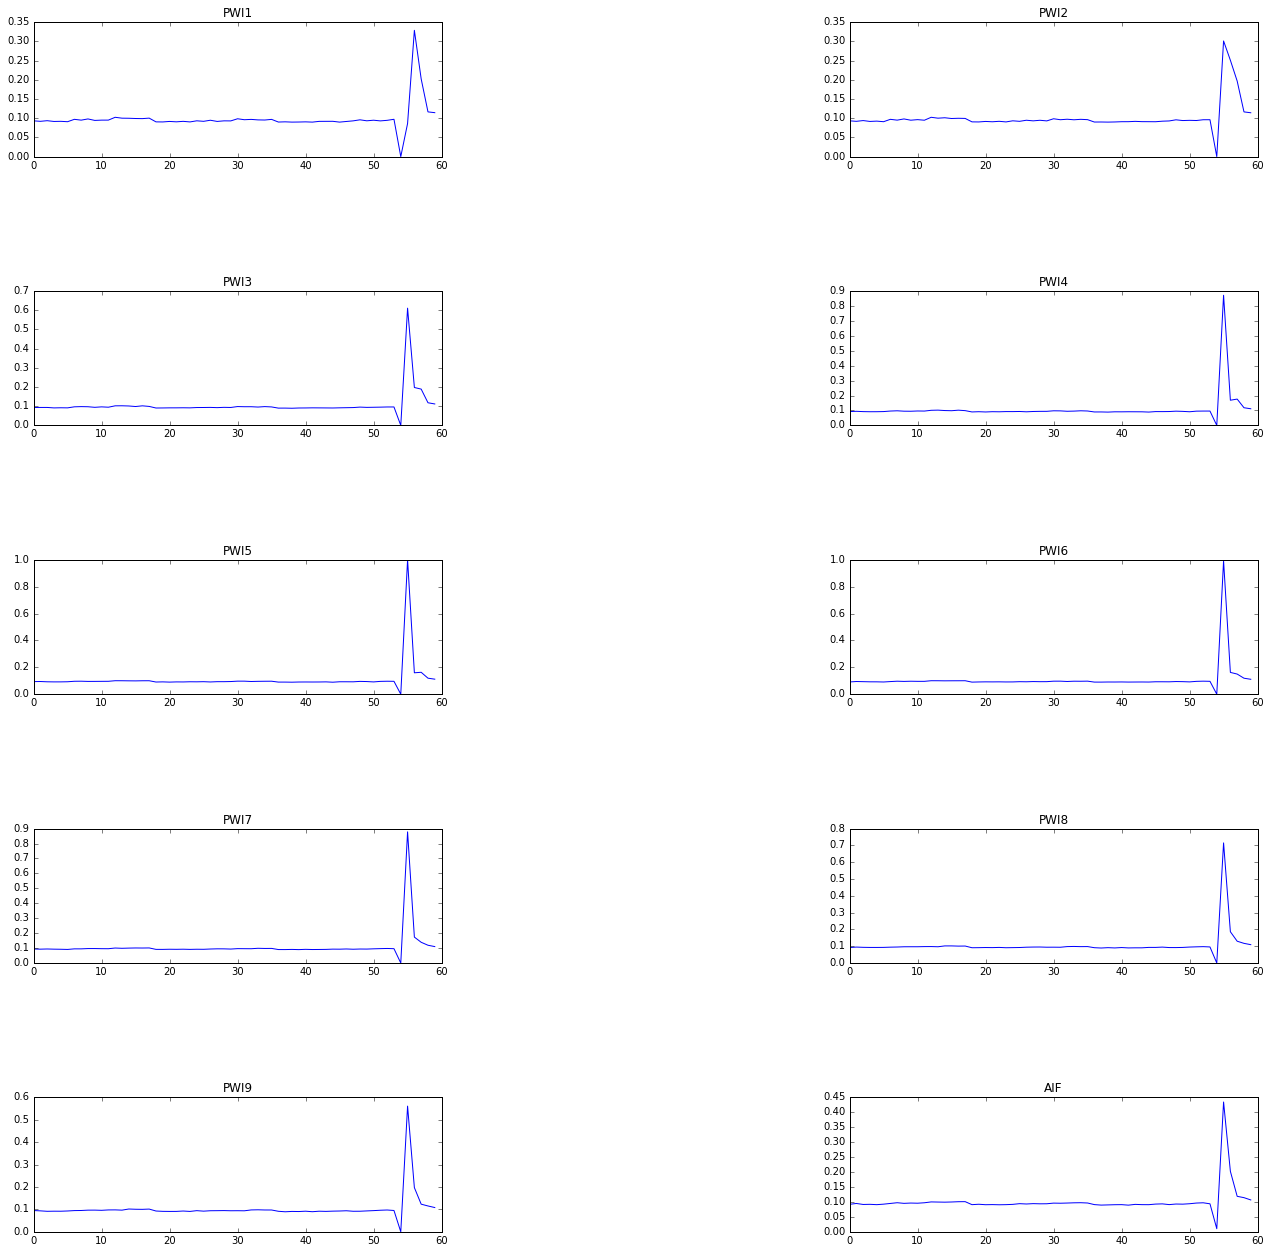

In [38]:
plt.figure(figsize = (20,20))

plt.subplot(521)    
plt.plot(time_series_feats2_reshaped[:,0])
plt.title('PWI1')
   
plt.subplot(522)
plt.plot(time_series_feats2_reshaped[:,1])
plt.title('PWI2')
    
plt.subplot(523)
plt.plot(time_series_feats2_reshaped[:,2])
plt.title('PWI3')
    
plt.subplot(524)
plt.plot(time_series_feats2_reshaped[:,3])
plt.title('PWI4')

plt.subplot(525)
plt.plot(time_series_feats2_reshaped[:,4])
plt.title('PWI5')

plt.subplot(526)
plt.plot(time_series_feats2_reshaped[:,5])
plt.title('PWI6')

plt.subplot(527)
plt.plot(time_series_feats2_reshaped[:,6])
plt.title('PWI7')

plt.subplot(528)
plt.plot(time_series_feats2_reshaped[:,7])
plt.title('PWI8')

plt.subplot(529)
plt.plot(time_series_feats2_reshaped[:,8])
plt.title('PWI9')

plt.subplot(5,2,10)
plt.plot(time_series_feats2_reshaped[:,9])
plt.title('AIF')
  
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=1,
                    wspace=1)

    
plt.show()

## Preparing Data for LSTM

In [54]:
train_data = data[data[0]<500]
test_data = data[data[0]>=500]

In [55]:
train_features = train_data.iloc[:,22:622]
test_features = test_data.iloc[:,22:622]

In [56]:
train_features.head()

,22,23,24,25,26,27,28,29,30,31,...,612,613,614,615,616,617,618,619,620,621
1,0.254260,0.254260,0.244270,0.242400,0.243180,0.243180,0.246440,0.246660,0.24715,0.248280,...,0.120020,0.123590,0.120340,0.116290,0.114440,0.111110,0.110490,0.108930,0.106310,0.104780
2,0.093129,0.093129,0.093157,0.092518,0.093686,0.091185,0.093855,0.092031,0.09493,0.092031,...,0.114400,0.114170,0.111660,0.111410,0.111810,0.110960,0.109900,0.109130,0.108310,0.106670
3,0.280220,0.280220,0.278970,0.278090,0.277970,0.278090,0.278620,0.281010,0.28101,0.279780,...,0.113090,0.109080,0.103190,0.096503,0.091461,0.088297,0.085691,0.084188,0.082517,0.081374
4,0.303570,0.303570,0.237200,0.236090,0.233560,0.236090,0.241900,0.242960,0.24765,0.248630,...,0.019480,0.020098,0.020716,0.021334,0.021952,0.022570,0.023188,0.023806,0.024424,0.025042
5,0.266690,0.266690,0.262710,0.262710,0.261090,0.261090,0.260560,0.259570,0.25990,0.259900,...,0.023582,0.020848,0.019954,0.020802,0.018717,0.018662,0.020141,0.018574,0.016199,0.013867


In [61]:
train_labels = train_data.iloc[:,622]
test_labels = test_data.iloc[:,622]

In [62]:
print(train_labels.shape)
print(test_labels.shape)

(42920,)
(7080,)


In [63]:
print(train_features.shape)
print(test_features.shape)

(42920, 600)
(7080, 600)


In [64]:
train_features_arr = train_features.as_matrix()
test_features_arr = test_features.as_matrix()

In [65]:
print(train_features_arr.shape)
print(test_features_arr.shape)


(42920, 600)
(7080, 600)


In [66]:
train_features_reshaped = train_features_arr.reshape(42920,60,10)
test_features_reshaped = test_features_arr.reshape(7080,60,10)

In [67]:
print(train_features_reshaped.shape)
print(test_features_reshaped.shape)

(42920, 60, 10)
(7080, 60, 10)


In [69]:
print(train_labels.shape)
print(test_labels.shape)

(42920,)
(7080,)


In [95]:
def get_hot_value(my_list):
    max_val = max(my_list)
    return [int(item == max_val) for item in my_list]

def fit_lstm(features, labels, batch_size, epochs, pickle_name):

    X = features

    y = np.array(labels)
    #le = preprocessing.LabelEncoder()
    #y = le.fit_transform(y)

    y = y.reshape(-1,1)
    ohe = OneHotEncoder(sparse=False)
    y = ohe.fit_transform(y)

    model = Sequential()
    model.add(LSTM(100, input_shape=(X[0].shape[0], X[0].shape[1]), return_sequences=False))
    #model.add(LSTM(100))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    model.summary()

    #es = EarlyStopping(monitor='loss', mode='auto', verbose=0)
    model.fit(X, y, batch_size=batch_size, epochs=epochs) #callbacks=[es])
    
    ##pickle the model    
    #pickle_folder = "pickles/"

    model.save(pickle_name)  # creates a HDF5 file 'my_model.h5'
    
    return

In [96]:
def test_lstm(test_features, test_labels, pickle_name):
    
    model = load_model(pickle_name)
    
    X = test_features
    y = np.array(test_labels)
    #le = preprocessing.LabelEncoder()
    #y = le.fit_transform(y)

    y = y.reshape(-1,1)
    ohe = OneHotEncoder(sparse=False)
    y = ohe.fit_transform(y)
    
    #Evaluate the model
    scores = model.evaluate(X, y, verbose=1)
    predicted_labels = model.predict(X)

    print("Accuracy: ", scores[1]*100)

    hot_list = [get_hot_value(sublist) for sublist in predicted_labels]

    #t  = np.array(y)
    #p  = np.array(hot_list)
    #t = np.argmax(t, axis=1)
    #p = np.argmax(p, axis=1)

    #print("Precision: ", precision_score(t, p, average=None))
    
    return hot_list, ohe

In [72]:
fit_lstm(train_features_reshaped, train_labels, 32, 10, 'lstm')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100)               44400     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
Total params: 44,602
Trainable params: 44,602
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
42920/42920 [==============================] - 178s 4ms/step - loss: 0.5643 - acc: 0.7131
Epoch 2/10
42920/42920 [==============================] - 144s 3ms/step - loss: 0.5241 - acc: 0.7394
Epoch 3/10
42920/42920 [==============================] - 143s 3ms/step - loss: 0.4774 - acc: 0.7776
Epoch 4/10
42920/42920 [==============================] - 143s 3ms/step - loss: 0.4233 - acc: 0.8146
Epoch 5/10
42920/42920 [==============================] - 143s 3ms/step - loss: 0.3651 - acc: 0.8423
Epoch 6/10
42920/42920 [=====

In [97]:
lstm_predicted_labels,ohe = test_lstm(test_features_reshaped, test_labels.as_matrix(), 'lstm.h5')

7080/7080 [==============================] - 9s 1ms/step
Accuracy:  86.63841807909604


In [103]:
lstm_labels_decoded = [0]*len(lstm_predicted_labels)
for i in range(len(lstm_predicted_labels)):
    if lstm_predicted_labels[i] == [1,0]:
        lstm_labels_decoded[i] = 0
    else:
        lstm_labels_decoded[i] = 1
        
print(lstm_labels_decoded)

[1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 

In [78]:
train_features_18 = train_data[[4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]]
test_features_18 = test_data[[4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]]

model_dec_tree = DecisionTreeClassifier(random_state = 42)

model_dec_tree.fit(train_features_18, train_labels)
dectree_predicted_labels = model_dec_tree.predict(test_features_18)
print(accuracy_score(test_labels,dectree_predicted_labels))

0.6954802259887005


In [107]:
print(len(lstm_labels_decoded))
print(len(dectree_predicted_labels))

7080
7080
